**Задание 1**
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

In [42]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [32]:
boston = load_boston()

In [33]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [34]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)

In [35]:
y = pd.DataFrame(boston.target, columns=['price'])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.


In [37]:
lr = LinearRegression()

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

In [38]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_pred = lr.predict(X_test)

Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [44]:
R2 = r2_score(y_test, y_pred)

In [45]:
R2

0.711226005748496

**Задание 2**
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble. Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.


In [55]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

In [59]:
y_pred = model.predict(X_test)

In [60]:
R2 = r2_score(y_test, y_pred)

In [61]:
R2

0.8749965273218174

Напишите в комментариях к коду, какая модель в данном случае работает лучше.

*Модель model намного лучше, чем lr*

**Задание 3**
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [75]:
help(RandomForestRegressor.feature_importances_)

Help on property:

    Return the feature importances (the higher, the more important the
       feature).
    
    Returns
    -------
    feature_importances_ : array, shape = [n_features]
        The values of this array sum to 1, unless all trees are single node
        trees consisting of only the root node, in which case it will be an
        array of zeros.



In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

<BarContainer object of 13 artists>

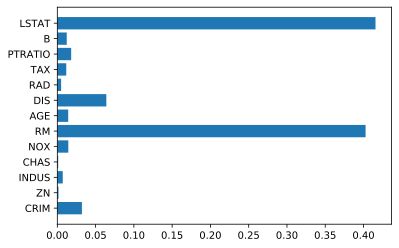

In [82]:
plt.barh(boston.feature_names, model.feature_importances_)

**LSTAT & RM**